In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from data_pipeline.retrieval import DataBank, download_adj_close
from data_pipeline.processing import ClusterInput

from sklearn.metrics import calinski_harabasz_score
def get_CH_score(df, clusters):
    labels = [clusters[col] for col in df.columns]
    X = df.T.values # transposes data so that features are columns instead of rows
    return calinski_harabasz_score(X, labels)


In [6]:
closing_prices = pd.read_pickle("./data/dataframes/closing_prices/closing_prices_monthly.pkl")
ROR = closing_prices.pct_change().dropna()
import pickle
with open('./models/industry_clusters.pkl', 'rb') as handle:
    industry_clusters = pickle.load(handle)

ind_to_tick = {industry : [tick for tick in industry_clusters.keys() if industry_clusters[tick] == industry] for industry in industry_clusters.values()}



In [11]:
TECH = ind_to_tick['Information Technology']
TECH = ROR[TECH]

Text(0.5, 0, 'Date')

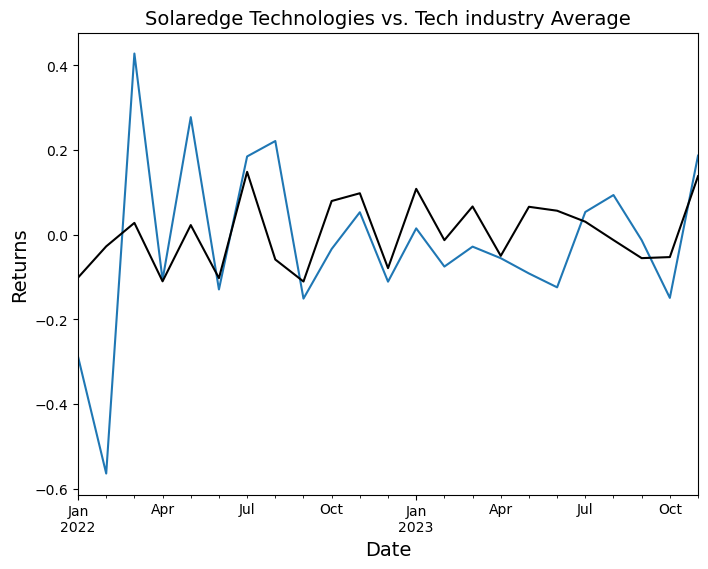

In [12]:

f, ax = plt.subplots(figsize = (8,6))

TECH["EPAM"].plot(ax = ax)
TECH.mean(axis = 1).plot(ax = ax, color = 'black')
ax.set_title("Solaredge Technologies vs. Tech industry Average", fontsize = 14)
ax.set_ylabel("Returns", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)
# ANET, ENPH # FSLR SEDG VRSN


# Making images of the pipeline

In [81]:
from matplotlib.collections import LineCollection
import matplotlib.dates as mdates
import matplotlib.cm as cm

def colorplot(df, tick, ax, color = 'Percent'):
    tick_df = df[[tick]].copy()#.rolling(10).mean().dropna().copy()
    if color == 'Percent':
        tick_df['color'] = tick_df.pct_change()
    else:
        tick_df['color'] = tick_df[tick]    
    
    tick_df = tick_df.dropna()

    xs = mdates.date2num(tick_df.index.to_pydatetime())
    pts = list(zip(xs, tick_df[tick].values))
    segs = [[pts[i], pts[i+1]] for i in range(len(pts) - 1)]
    segments = np.hstack([segs[:-1], segs[1:]])
    #segments = segs

    colours = tick_df.color.values
    colours_normalized = (colours + 0.4)/(0.9)
    cmap = cm.RdYlGn(colours_normalized)
    coll = LineCollection(segments, colors = cmap)
    
    ax.add_collection(coll)
    ax.autoscale_view()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    monthFmt = mdates.DateFormatter("%b")
    ax.xaxis.set_major_formatter(monthFmt)

In [82]:

from data_pipeline.processing import l2_normalization
from data_pipeline.processing import market_adjust
from data_pipeline.processing import industry_adjust

columns = closing_prices.columns

HEALTH = ind_to_tick['Health Care']

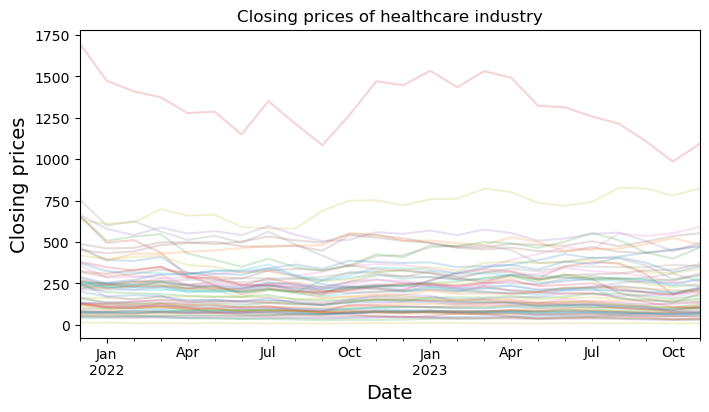

In [86]:

import numpy as np
from matplotlib.ticker import FormatStrFormatter

f, ax = plt.subplots(figsize = (8,4))
ax.set_title("Closing prices of healthcare industry")
#for tick in HEALTH:
#    colorplot(closing_prices, tick, ax)
closing_prices[HEALTH].plot(ax = ax, legend = False, alpha = 0.2)

ax.set_ylabel("Closing prices", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)

plt.show()


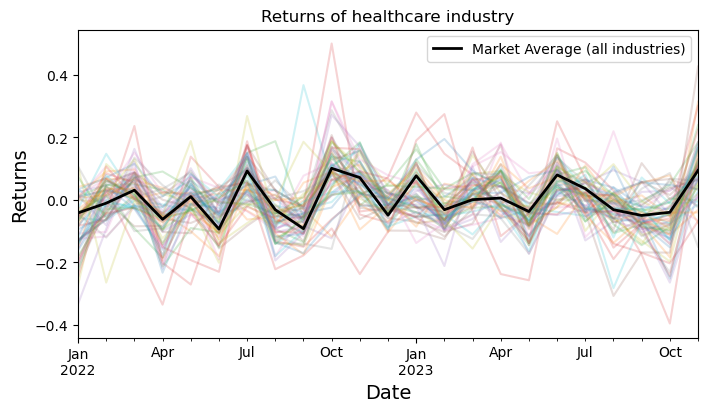

In [44]:
returns = closing_prices.pct_change().dropna()
f, ax = plt.subplots(figsize = (8,4))
ax.set_title("Returns of healthcare industry")
returns[HEALTH].plot(ax = ax, legend = False, alpha =0.2)

market_returns = pd.DataFrame({'Market Average (all industries)' : returns.mean(axis = 1).values}, index = list(returns.index))

market_returns.plot(ax = ax, color = 'black', linewidth = 2)

ax.set_ylabel("Returns", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)

plt.show()


Text(0.5, 0, 'Date')

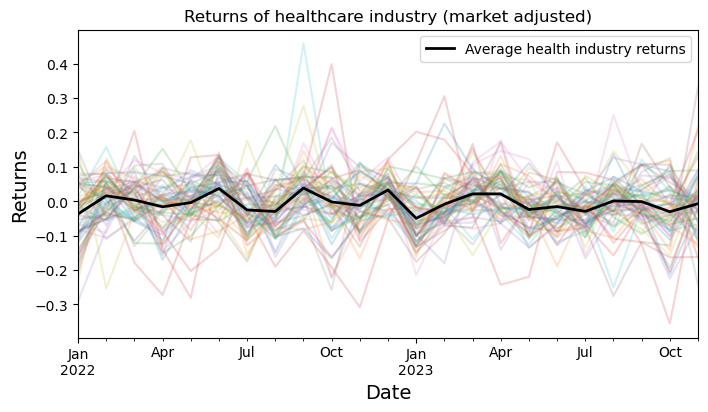

In [49]:
returns_health_market_adj = market_adjust(returns)[HEALTH]

f, ax = plt.subplots(figsize = (8,4))
ax.set_title("Returns of healthcare industry (market adjusted)")
returns_health_market_adj.plot(ax = ax, legend = False, alpha = 0.2)

health_returns = pd.DataFrame({'Average health industry returns' : returns_health_market_adj.mean(axis = 1).values}, index = list(returns.index))
health_returns.plot(ax = ax, color = 'black', linewidth = 2)

ax.set_ylabel("Returns", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)


Text(0.5, 0, 'Date')

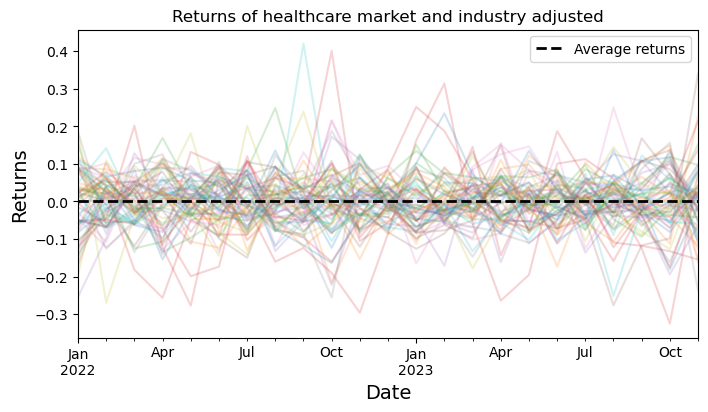

In [46]:

returns_health_market_industry_adj = industry_adjust(market_adjust(returns), list(industry_clusters.values()))[HEALTH]

f, ax = plt.subplots(figsize = (8,4))
ax.set_title("Returns of healthcare market and industry adjusted")
returns_health_market_industry_adj.plot(ax = ax, legend = False, alpha = 0.2)

mean = pd.DataFrame({'Average returns' :returns_health_market_industry_adj.mean(axis = 1).values}, index = list(returns.index))
mean.plot(ax = ax, color = 'black', linewidth = 2, style = "--")

ax.set_ylabel("Returns", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)

Text(0.5, 0, 'Date')

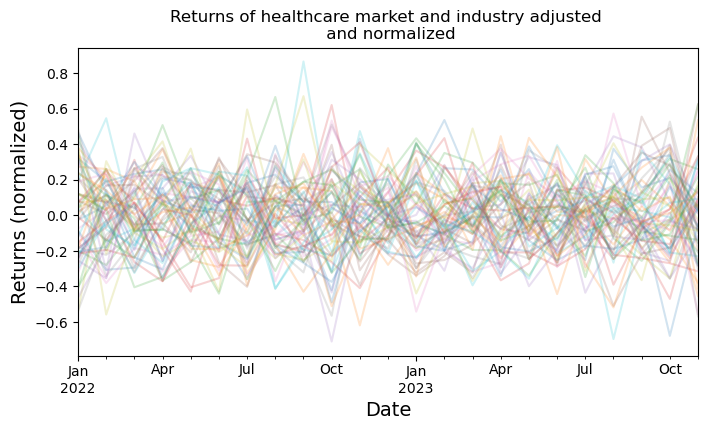

In [89]:
returns_health_market_industry_adj_l2 = l2_normalization(industry_adjust(market_adjust(returns), list(industry_clusters.values())))[HEALTH]

f, ax = plt.subplots(figsize = (8,4))
ax.set_title("Returns of healthcare market and industry adjusted \n and normalized")
returns_health_market_industry_adj_l2.plot(ax = ax, legend = False, alpha = 0.2)

ax.set_ylabel("Returns (normalized)", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)

Text(0.5, 0, 'Date')

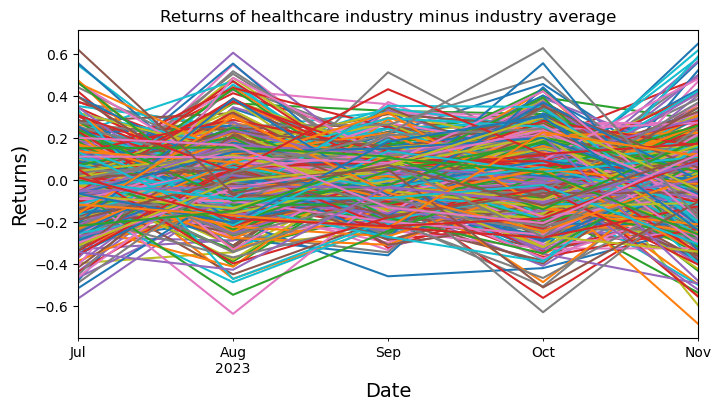

In [47]:

from data_pipeline.processing import l2_normalization

ROR_ind_adjust_l2 = l2_normalization(ROR_ind_adjust)[-5:]

f, ax = plt.subplots(figsize = (8,4))
ax.set_title("Returns of healthcare industry minus industry average")
ROR_ind_adjust_l2.plot(ax = ax, legend = False)
    #colorplot(closing_prices_l2, tick, axarr[0])#, closing_prices_l2[[tick]].pct_change())
    #colorplot(ROR, tick, axarr[1], color = 'value')

#average_ROR = pd.DataFrame({'Average ROR' : month_ROR.mean(axis = 1).values}, index = list(month_ROR.index))

#average_ROR.plot(ax = ax, color = 'black')

ax.set_ylabel("Returns)", fontsize = 14)
ax.set_xlabel("Date", fontsize = 14)

In [48]:
# Importing some things to get rid of warnings
import os
nthreads = 1
os.environ["OMP_NUM_THREADS"] = str(nthreads) 
os.environ["OPENBLAS_NUM_THREADS"] = str(nthreads) 
os.environ["MKL_NUM_THREADS"] = str(nthreads)

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [7]:
# The usual suspects

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
from sklearn.cluster import KMeans

import SP500models as models


In [8]:
KMeans.__dict__

mappingproxy({'__module__': 'sklearn.cluster._kmeans',
              '__doc__': 'K-Means clustering.\n\n    Read more in the :ref:`User Guide <k_means>`.\n\n    Parameters\n    ----------\n\n    n_clusters : int, default=8\n        The number of clusters to form as well as the number of\n        centroids to generate.\n\n    init : {\'k-means++\', \'random\'}, callable or array-like of shape             (n_clusters, n_features), default=\'k-means++\'\n        Method for initialization:\n\n        \'k-means++\' : selects initial cluster centers for k-mean\n        clustering in a smart way to speed up convergence. See section\n        Notes in k_init for more details.\n\n        \'random\': choose `n_clusters` observations (rows) at random from data\n        for the initial centroids.\n\n        If an array is passed, it should be of shape (n_clusters, n_features)\n        and gives the initial centers.\n\n        If a callable is passed, it should take arguments X, n_clusters and a\n  

In [14]:
class KMeans_Reclustering(KMeans):
    def __init__(self):
        KMeans.__init__(n_clusters=8, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
    # the fit function behaves almost exactly like the usual scikit learn models.
    def refine_clusters(self, input_list, old_labels, n_clusters):

        if not len(input_list) == len(old_labels):
            print("Input dataframe list should be the same length as the old cluster labels")
            return None
        if not len(old_labels) == len(n_clusters):
            print("Defaulting to 5 clusters per old cluster")
            n_clusters = [5]*len(old_labels)
        
        # perform the kmeans fitting within each cluster:
        for df, label, n in zip(input_list, old_labels, n_clusters):
            print(f"Fitting Kmeans for {label}")
            self.__init__(n_clusters = n)
            kmeans = self.fit(df)
            labels+= [[label + str(l) for l in kmeans.labels_]]

        return labels

In [50]:
columns = adj_closing_prices.columns
labels = data_bank.get_sectors_list()
sector_to_ticker_map = data_bank.sector_to_ticker_map(columns)

sector_dfs = [adj_closing_prices.iloc[:, [1*(l == sector) for l in labels]]] for sector in labels]

KeyError: "['BF.B'] not in index"